<a href="https://colab.research.google.com/github/PriyaDeshpande1605/Advanced-Genetic-Algo/blob/main/AI_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import random
from itertools import count
mutation_prob = .7
import matplotlib.pyplot as plt
random.seed(10)
numpy.random.seed(42)


In [ ]:


def mutate (path): # swap two random elements
  r = random.random()
  temp = 0
  if r > mutation_prob: return path
  index1 = random.randint(0,13)
  index2 = random.randint(0,13)
  temp = path[index1]
  path[index1] = path[index2]
  path[index2] = temp
  return path

def crossover ( path1, path2 ):
  child = []
  start = random.randint(0,13)
  end = random.randint(start,14)

  subset = path1[start:end]
  k = 0
  #print(subset)
  for i in range(14):
    if path2[i] not in subset:
      if k == start: k = end
      path1[k] = path2[i]
      k+=1

  return path1

def crossover1 ( path1, path2 ):
  child = []
  start = random.randint(0,13)
  end = random.randint(start,14)

  subset = path1[start:end]
  k = 0
  #print(subset)
  for i in range(14):
    if i >= start and i < end: continue
    while k < 14 and path2[k] in subset:
      k+=1
    path1[i] = path2[k]
    k+=1
  return path1


  return path1

def getcost ( distances, path ):
  cost = 0
  for i in range( len(path)-1):
    cost+= distances[ord(path[i])-ord('A')][ord(path[i+1])-ord('A')]
  cost+= distances[ord(path[-1])-ord('A')][ord(path[0])-ord('A')]
  return cost

def fitness (path,distances):
  cost = getcost(distances, path)

  return 1/cost
  #return 1000/cost


def crossover_prob ( population ,distances):
  weights = []
  total_fitness = 0
  for i in range(len(population)):
    total_fitness += fitness(population[i],distances)
  for i in range(len(population)):
    weights.append(fitness(population[i],distances)/ total_fitness)
  parents = random.choices( population, weights ,k =  2 )
  return parents




In [ ]:
x = []
y = []

In [ ]:
# paie wise distances
inf = 1000
distances = [[0,inf,inf,inf,inf,inf,.15,inf,inf,.2,inf,.12,inf,inf],
[inf,0,inf,inf,inf,inf,inf,.19,.4,inf,inf,inf,inf,.13],
[inf,inf,0,.6,.22,.4,inf,inf,.2,inf,inf,inf,inf,inf],
[inf,inf,.6,0,inf,.21,inf,inf,inf,inf,.3,inf,inf,inf],
[inf,inf,.22,inf,0,inf,inf,inf,.18,inf,inf,inf,inf,inf],
[inf,inf,.4,.21,inf,0,inf,inf,inf,inf,.37,.6,.26,.9],
[.15,inf,inf,inf,inf,inf,0,inf,inf,inf,.55,.18,inf,inf],
[inf,.19,inf,inf,inf,inf,inf,0,inf,.56,inf,inf,inf,.17],
[inf,.4,.2,inf,.18,inf,inf,inf,0,inf,inf,inf,inf,.6],
[.2,inf,inf,inf,inf,inf,inf,.56,inf,0,inf,.16,inf,.5],
[inf,inf,inf,.3,inf,.37,.55,inf,inf,inf,0,inf,.24,inf],
[.12,inf,inf,inf,inf,.6,.18,inf,inf,.16,inf,0,.4,inf],
[inf,inf,inf,inf,inf,.26,inf,inf,inf,inf,.24,.4,0,inf],
[inf,.13,inf,inf,inf,.9,inf,.17,.6,.5,inf,inf,inf,0]]

# initial population



In [ ]:
def main():
  max_iter = 100
  mutation_prob = 0.9
  best_fitness = 0
  population = []
  bestlist = []

  for i in range (20):
    population.append(['A','B','C','D','E','F','G','H','I','J','K','L','M','N'])
  gen_best = -1
  for i in range(max_iter):
    new_population = []
    x.append(i)
    gen_best = 0
    mutation_prob = 0.9*mutation_prob if mutation_prob >0.2 else 0.2
    for j in range(len(population)+1):

      # parent1_index = random.randint(0, len(population)-1 )
      # parent2_index = random.randint(0, len(population)-1 )
      # new_child = crossover( population[parent1_index], population[parent2_index] )

      parents = crossover_prob(population,distances)
      new_child = crossover( parents[0], parents[1] )

      mutated_new_child = mutate(new_child)

      new_population.append(mutated_new_child)
      fit = fitness(mutated_new_child,distances)
      #print(fit)
      if fit > gen_best:
        gen_best = fit
        #print(gen_best)
      if fit > best_fitness:
        best_fitness = fit
        #print(best_fitness)

        print(mutated_new_child)
        best_path = mutated_new_child
    print(len(new_population))
    population = new_population
    y.append(gen_best)
    if y.count( max(y) ) > 5: break

  plt.plot(x,y)
  plt.show
  return best_path, best_fitness



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'I', 'J', 'K', 'L', 'M', 'H']
['A', 'F', 'C', 'D', 'E', 'B', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']
['A', 'B', 'C', 'D', 'K', 'F', 'G', 'H', 'I', 'J', 'E', 'L', 'M', 'N']
['A', 'H', 'C', 'D', 'K', 'F', 'G', 'B', 'I', 'J', 'E', 'L', 'M', 'N']
['A', 'B', 'K', 'D', 'F', 'M', 'E', 'G', 'H', 'I', 'C', 'J', 'L', 'N']
['A', 'G', 'C', 'D', 'K', 'F', 'H', 'B', 'I', 'J', 'E', 'L', 'M', 'N']
21
22
23
['L', 'M', 'B', 'I', 'J', 'H', 'K', 'C', 'E', 'N', 'D', 'F', 'G', 'A']
24
['D', 'C', 'L', 'A', 'J', 'G', 'K', 'E', 'N', 'B', 'H', 'M', 'F', 'I']
25
26
27
['D', 'N', 'K', 'A', 'J', 'H', 'B', 'G', 'L', 'E', 'I', 'C', 'M', 'F']
28
['F', 'N', 'I', 'E', 'L', 'G', 'A', 'J', 'H', 'B', 'D', 'K', 'M', 'C']
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
['A', 'J', 'N', 'B', 'I', 'C', 'E', 'H', 'G', 'M', 'K', 'D', 'F', 'L']
84
85
86
87
88
89
90
91
92
93


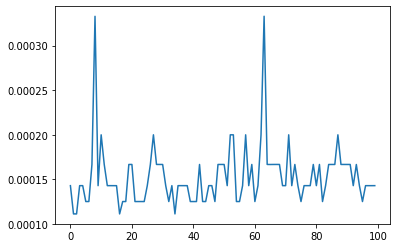

In [ ]:
obj = main()

In [ ]:
obj

(['M', 'E', 'N', 'F', 'L', 'J', 'A', 'B', 'K', 'I', 'C', 'H', 'G', 'D'],
 0.0003329870268254349)